In practice, we do not observe which funds are skilled or unskilled. We have to estimate
this using data on realized returns (or holdings). Let’s simulate some data to understand
this problem.
For each part below, simulate a panel of N = 1000 funds with a time-series of T = 120
months each. Assume a market model data-generating process with normally distributed
excess market returns and residual where the mean market excess return’s mean is 5% per
year and its volatility is 20% per year. Assume residual volatility of 30% per year and that
all funds have a beta of 1. Monthly fund excess returns, re
it, are generated by:
reit = αi + βiremkt,t + εit 

where E[remkt,t] = 5%/12, sd(remkt,t) = 0.2/√12, and sd(εit) = 0.3/√12

We will vary the distribution of skill (α) in the cross-section of funds in the parts below.

Part 1—No Skilled Funds:
Run the simulation assuming each fund is truly unskilled, so αi = 0 for all i.
1. For each fund, estimate its alpha and t-statistic. How many funds are skilled at the
5% significance level based on t-statistics?
2. Plot the distributions of t-statistics and p-values for alpha.
3. What does the distribution of p-values look like?

In [167]:
#import statements
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [168]:
#definition of function

def genabnret(mu, sigma, observations, error=0,alpha=0): 
    #create market return
    listofmarkret = np.random.normal(mu, sigma, observations)
    #assume beta = 1 produce manager returns
    listofmanagerret = [x+alpha/12+np.random.normal(0,error) for x in listofmarkret]
    return(listofmarkret,listofmanagerret)


def simulation(trials, mu, sigma, observations, error=0,alpha=0):
    listoftvalues = []
    listofalphas = []
    listofpvalues = []
    for x in range(1,trials+1):

        xyvars = genabnret(mu, sigma, observations, error,alpha)

        # Add a constant term to the independent variable
        x_with_const = sm.add_constant(xyvars[0])

        # Fit the regression model
        model = sm.OLS(xyvars[1], x_with_const)
        results = model.fit()
        listoftvalues.append(results.tvalues[0])
        listofalphas.append(results.params[0])
        listofpvalues.append(results.pvalues[0])
        
    return(listofalphas,listoftvalues,listofpvalues)


    

the amount of significant alphas is:
23


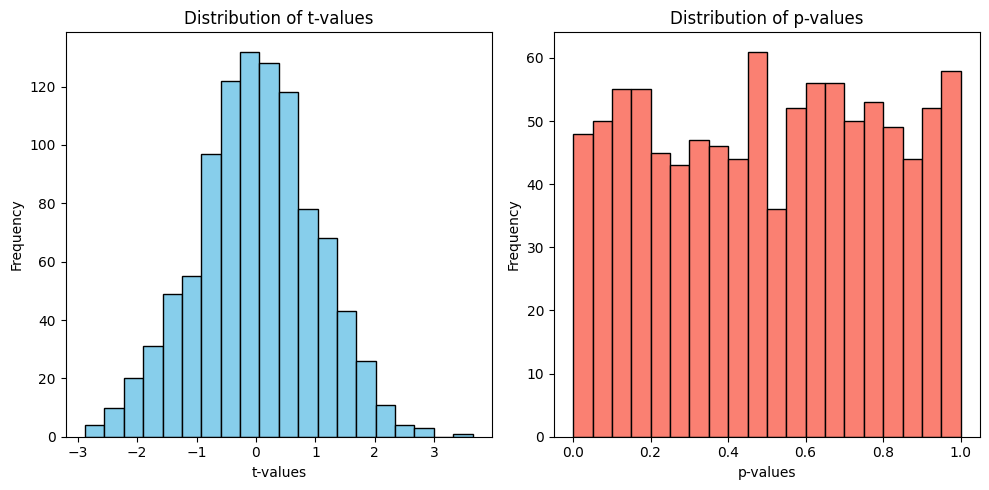

running this multiple times, it seems the distribution of p values is roughly uniform from 0 to 1, and the distribution of t-values looks to be normal, with a standard deviation that's larger than one, but not by much.


<Figure size 640x480 with 0 Axes>

In [169]:
datasimulation = simulation(1000,.05/12,.2/np.sqrt(12),120,.03/np.sqrt(12),0)
print('the amount of significant alphas is:')
print(sum(1 for i in datasimulation[1] if i>= 1.96))

# Plot the distribution of t-values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(datasimulation[1], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of t-values')
plt.xlabel('t-values')
plt.ylabel('Frequency')

# Plot the distribution of p-values
plt.subplot(1, 2, 2)
plt.hist(datasimulation[2], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of p-values')
plt.xlabel('p-values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.clf()

print("running this multiple times, it seems the distribution of p values is roughly uniform from 0 to 1, and the distribution of t-values looks to be normal, with a standard deviation that's larger than one, but not by much.")


Part 2—Some Skilled Funds:
Now let’s add some skill to the true underlying distribution. Suppose that a fraction of funds
λ are truly skilled with alpha of 2.5% per year. What do the simulations and estimated
statistics look like now? Consider λ values of 0.1, 0.25, 0.5, and 0.75.
1. For each λ value, make a plot of the cross-sectional distribution of estimated α, their
t-stats, and the p-values. How does the p-value distribution change with the fraction
of truly skilled funds?
2. How many of the truly skilled funds have insignificant alpha estimates? And how many
of the truly unskilled funds are identified as skilled based on significantly positive alpha
estimates? For each λ value, report the percentage of funds in each of the following
classifications:
                Estimated Skill
                Y               N
 True Skill Y True Positive False Negative
            N False Positive True Negative



NOTE: You are expected to upload your code and output to your GitHub site. Please
also upload the PDF response document to Canvas, including a link to the GitHub code
repository.

0


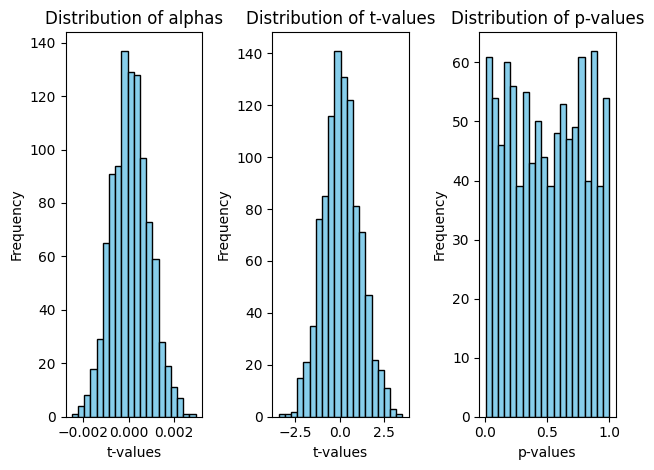

0
this is because of the first loop
the number of true positives is 0 thus they make up 0.0 percent of the population
the number of false positives is 42 thus they make up 4.2 percent of the population
the number of true negatives is 958 thus they make up 95.8 percent of the population
the number of false negatives is 0 thus they make up 0.0 percent of the population
100.0


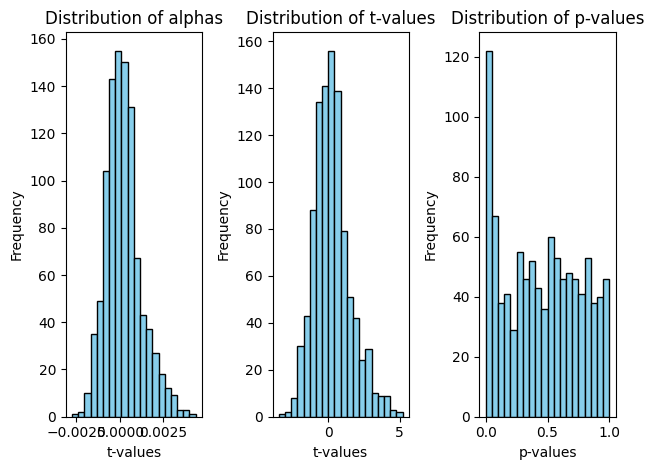

100.0
this is because of the first loop
the number of true positives is 79 thus they make up 7.9 percent of the population
the number of false positives is 25 thus they make up 2.5 percent of the population
the number of true negatives is 875 thus they make up 87.5 percent of the population
the number of false negatives is 21 thus they make up 2.1 percent of the population
250.0


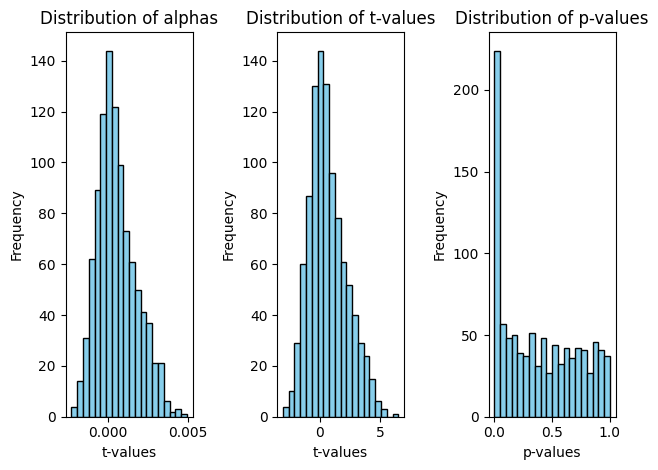

250.0
this is because of the first loop
the number of true positives is 181 thus they make up 18.1 percent of the population
the number of false positives is 23 thus they make up 2.3 percent of the population
the number of true negatives is 727 thus they make up 72.7 percent of the population
the number of false negatives is 69 thus they make up 6.9 percent of the population
500.0


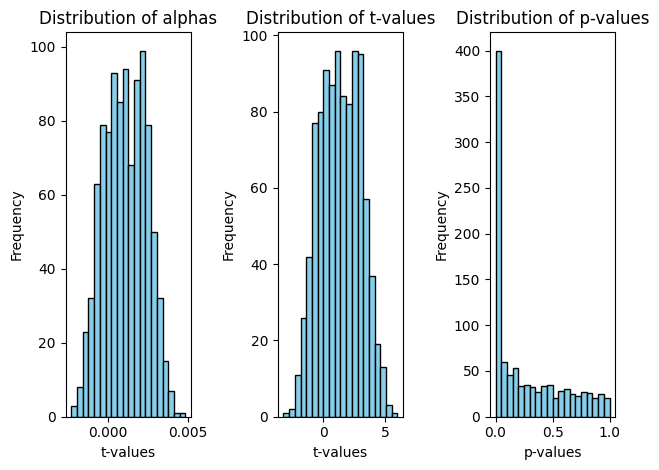

500.0
this is because of the first loop
the number of true positives is 381 thus they make up 38.1 percent of the population
the number of false positives is 10 thus they make up 1.0 percent of the population
the number of true negatives is 490 thus they make up 49.0 percent of the population
the number of false negatives is 119 thus they make up 11.9 percent of the population
750.0


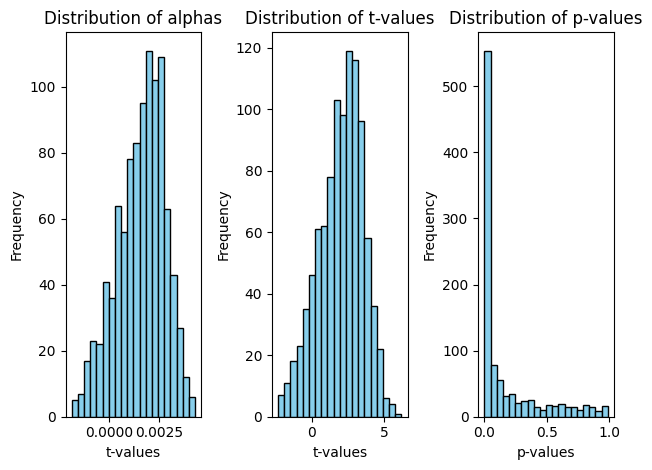

750.0
this is because of the first loop
the number of true positives is 544 thus they make up 54.4 percent of the population
the number of false positives is 8 thus they make up 0.8 percent of the population
the number of true negatives is 242 thus they make up 24.2 percent of the population
the number of false negatives is 206 thus they make up 20.6 percent of the population


In [172]:
lambdavalues= [0,.1,.25,.5,.75]

for val in lambdavalues:
    val = 1000*val
    print(val)
    hasalphadatasimulation = simulation(int(val),.05/12,.2/np.sqrt(12),120,.03/np.sqrt(12),.025)
    noalphadatasimulation = simulation(int(1000-val),.05/12,.2/np.sqrt(12),120,.03/np.sqrt(12),0)
    
    alldata = (hasalphadatasimulation[0]+noalphadatasimulation[0],hasalphadatasimulation[1]+noalphadatasimulation[1],hasalphadatasimulation[2]+noalphadatasimulation[2])
    # Plot the distribution of alphas
    
    plt.subplot(1, 3, 1)
    plt.hist(alldata[0], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of alphas')
    plt.xlabel('t-values')
    plt.ylabel('Frequency')

    # Plot the distribution of t-values
    plt.subplot(1, 3, 2)
    plt.hist(alldata[1], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of t-values')
    plt.xlabel('t-values')
    plt.ylabel('Frequency')

    # Plot the distribution of p-values
    plt.subplot(1, 3, 3)
    plt.hist(alldata[2], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of p-values')
    plt.xlabel('p-values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    if val != 750:
        plt.clf()
    print(val)
    
    print("this is because of the first loop")
    print("the number of true positives is "+str(sum(1 for i in hasalphadatasimulation[1] if i>= 1.96))+" thus they make up " + str(sum(1 for i in hasalphadatasimulation[1] if i>= 1.96)/10)+ ' percent of the population')
    print("the number of false positives is "+str(sum(1 for i in noalphadatasimulation[1] if i>= 1.96))+" thus they make up " + str(sum(1 for i in noalphadatasimulation[1] if i>= 1.96)/10)+ ' percent of the population')
    print("the number of true negatives is "+str(sum(1 for i in noalphadatasimulation[1] if i<= 1.96))+" thus they make up " + str(sum(1 for i in noalphadatasimulation[1] if i<= 1.96)/10)+ ' percent of the population')
    print("the number of false negatives is "+str(sum(1 for i in hasalphadatasimulation[1] if i<= 1.96))+" thus they make up " + str(sum(1 for i in hasalphadatasimulation[1] if i<= 1.96)/10)+ ' percent of the population')



    
